In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import plotly.express as px

## Analiza rzutu ukośnego w przestrzeni trójwymiarowej

WWW: [https://en.wikipedia.org/wiki/Projectile_motion](https://en.wikipedia.org/wiki/Projectile_motion)

Rzut ukośny w przestrzeni 3D jest rozszerzeniem klasycznego problemu rzutu ukośnego, uwzględniającym trzy wymiary: x (poziomy), y (głębokość) oraz z (pionowy). W tej analizie skupimy się na formalnym opisie sił i równań ruchu za pomocą wektorów i równań różniczkowych.

### Siły działające

W przestrzeni trójwymiarowej na ciało rzucone pod kątem względem poziomu działa głównie siła grawitacji, którą można zapisać jako:

$$
\vec{F}_g = m \vec{g} = \begin{bmatrix} 0 \\ 0 \\ -mg \end{bmatrix}
$$

gdzie:
- \(m\) jest masą ciała,
- \(\vec{g}\) jest wektorem przyspieszenia grawitacyjnego, mającym kierunek pionowy i wartość w przybliżeniu równą \(9.81 \, \text{m/s}^2\) skierowaną w dół.

### Równania ruchu

Stosując drugie prawo Newtona w formie wektorowej \( \vec{F} = m \vec{a} \), otrzymujemy równania ruchu dla każdej z osi. Przyjmujemy, że opór powietrza jest zaniedbywany, co jest typowe dla uproszczonych modeli rzutu ukośnego.

#### Równania różniczkowe ruchu

Równania ruchu można wyrazić jako system równań różniczkowych:

$$
\frac{d^2\vec{r}}{dt^2} = \vec{g}
$$

gdzie \(\vec{r}\) to wektor położenia ciała. W komponentach, przyjmując \(\vec{r} = \begin{bmatrix} x(t) \\ y(t) \\ z(t) \end{bmatrix}\), równania przyjmują formę:

$$
\frac{d^2x}{dt^2} = 0, \quad \frac{d^2y}{dt^2} = 0, \quad \frac{d^2z}{dt^2} = -g
$$

Integrując te równania względem czasu, otrzymujemy równania prędkości:

$$
\frac{dx}{dt} = v_{x0}, \quad \frac{dy}{dt} = v_{y0}, \quad \frac{dz}{dt} = v_{z0} - gt
$$

gdzie \(v_{x0}\), \(v_{y0}\), \(v_{z0}\) to składowe prędkości początkowej w kierunkach odpowiednio x, y, z. Kolejna integracja daje nam równania położenia:

$$
x(t) = x_0 + v_{x0}t, \quad y(t) = y_0 + v_{y0}t, \quad z(t) = z_0 + v_{z0}t - \frac{1}{2}gt^2
$$

### Wnioski

Analiza rzutu ukośnego w przestrzeni trójwymiarowej za pomocą wektorów i równań różniczkowych pozwala na dokładne opisanie trajektorii ruchu obiektu. Dzięki rozdzieleniu ruchu na komponenty możemy łatwiej analizować wpływ różnych sił oraz warunków początkowych na zachowanie się ciała w przestrzeni.


In [2]:
# pokażmy w sympy, że nasz model jest poprawny
import sympy as sp
t, x0, y0, z0, v_x0, v_y0, v_z0, g = sp.symbols('t x0 y0 z0 v_x0 v_y0 v_z0 g')

# równania różniczkowe mx'' = 0, my'' = 0, mz'' = -g
# Definicja równań różniczkowych
x = sp.Function('x')(t)
y = sp.Function('y')(t)
z = sp.Function('z')(t)

# Równania różniczkowe
eq_x = sp.Eq(sp.diff(x, t, t), 0)
eq_y = sp.Eq(sp.diff(y, t, t), 0)
eq_z = sp.Eq(sp.diff(z, t, t), -g)

# Rozwiązania równań różniczkowych
sol_x = sp.dsolve(eq_x, x)
sol_y = sp.dsolve(eq_y, y)
sol_z = sp.dsolve(eq_z, z)
# rozwiązania równań różniczkowych x(t)
sol_x

Eq(x(t), C1 + C2*t)

In [3]:
# rozwiązania równań różniczkowych y(t)
sol_y

Eq(y(t), C1 + C2*t)

In [4]:
# rozwiązania równań różniczkowych z(t)
sol_z

Eq(z(t), C1 + C2*t - g*t**2/2)

In [5]:
# warunki początkowe dla x(t)
# x(0) = x0
sol_x.rhs.subs(t, 0)

C1

In [6]:
# x'(0) = v_x0
sp.diff(sol_x.rhs, t).subs(t, 0)

C2

# Maksymalny zasięg rzutu ukośnego

Znajdźmy pierwiastki równania $z(t)=z_0+v_{z0}t-\frac{1}{2}gt^2=0$ aby znaleźć czas $t_0$ w którym ciało dotknie ziemi. Następnie obliczmy położenie $x(t_0)$ w tym czasie dla równania $x(t)=x_0+v_{x0}t$. Analogicznie znajdziemy drugi czas $t_1$ w którym ciało dotknie ziemi oraz obliczymy położenie $x(t_1)$. Ostatecznie obliczymy zasięg rzutu jako różnicę $x(t_1)-x(0)$.

In [7]:
# znajdź pierwiastki równania z(t) = 0 , czas dotknięcia ziemi
import sympy as sp
t, z0, v_z0, x0, v_x0,g = sp.symbols('t z0 v_z0 x0 v_x0 g')
x=x0 + v_x0*t
z = z0 + v_z0*t - g*t**2/2
roots = sp.solve(z, t)
t0=roots[0]
t0

(v_z0 - sqrt(2*g*z0 + v_z0**2))/g

In [8]:
t1=roots[1]
t1

(v_z0 + sqrt(2*g*z0 + v_z0**2))/g

In [9]:
# podsawienie wartości do wzoru z(t_1)
x.subs(t, 0).simplify()

x0

In [10]:
# podsawienie wartości do wzoru z(t_2)
x.subs(t, t1).simplify()

(g*x0 + v_x0*(v_z0 + sqrt(2*g*z0 + v_z0**2)))/g

In [11]:
zasieg=(x.subs(t, t1)-x.subs(t, 0)).simplify()
zasieg

v_x0*(v_z0 + sqrt(2*g*z0 + v_z0**2))/g

In [12]:
# jeśli z0=0 to zasięg wynosi
zasieg.subs(z0, 0).simplify()

v_x0*(v_z0 + sqrt(v_z0**2))/g

# Maksymalna wysokość rzutu

To zadanie można wykonać szukając maksimum funkcji $z(t)$, czyli pochodnej $z'(t)$ równą zero. Następnie obliczamy wartość funkcji $z(t)$ w tym punkcie.


In [13]:
# znajdź maksimum funkcji z(t)
zdiff=z.diff(t).simplify()
zdiff

-g*t + v_z0

In [14]:
czas_max=sp.solve(zdiff, t)
czas_max

[v_z0/g]

In [15]:
# oblicz położenie z(t) dla czasu t_max
z_max=z.subs(t, czas_max[0]).simplify()
z_max

z0 + v_z0**2/(2*g)

# Czas lotu

Czas lotu ciała można obliczyć jako czas spotkania z ziemią, czyli czas $t_1$ z poprzedniego punktu. 


In [16]:
t1

(v_z0 + sqrt(2*g*z0 + v_z0**2))/g

In [17]:
# oblicz czas lotu dla z0=0 (czyli ciało startuje z poziomu ziemi)
t1.subs(z0, 0).simplify()

(v_z0 + sqrt(v_z0**2))/g

# Numerical solution

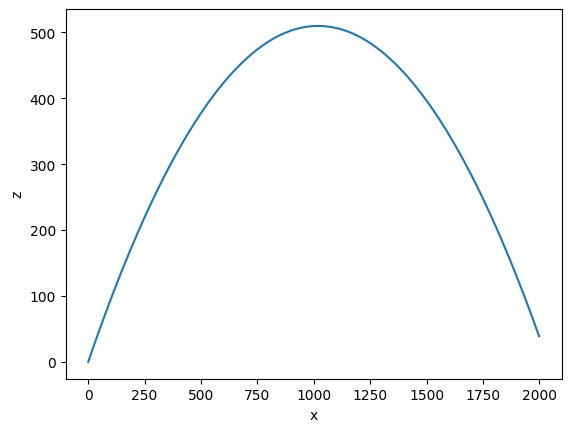

In [18]:
import numpy as np
from Newton_solver import NewtonSolverIVP3D

g=9.81  # przyspieszenie ziemskie [m/s^2]

def rzut_ukosny(t, position, velocity):
    k = 1.0  # Spring constant
    return [0, 0, -g]


# Solver
solver = NewtonSolverIVP3D()
solver.add_force(rzut_ukosny)  # dodaj siłę grawitacji
solver.set_initial_conditions([0.0, 0.0, 0.0], [100.0, 0.0, 100.0])  # warunki początkowe
solver.set_mass(1.0)  # masa ciała
t, position, velocity = solver.solve_motion([0, 20], time_step=0.01)


# Wykres
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(position[0], position[2])
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.show()